Uncomment `return image, target, self.label_encoder.inverse_transform([cell_type - 1])[0], image_id` at `src/dataset.py` file before running this script

In [16]:


import os
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

from skimage import color
from torchvision.utils import draw_segmentation_masks
from src.dataset import CellDataset

from dotenv import load_dotenv
from easydict import EasyDict
from src.augmentations import train_transform
from src.visualization import tensor_to_image

def set_deterministic():
    np.random.seed(0)
    random.seed(0)

load_dotenv()



True

In [17]:
def swap_columns(data: np.array):
    data[:, 0], data[:, 1] = data[:, 1], data[:, 0]
    data[:, 2], data[:, 3] = data[:, 3], data[:, 2]
    return data

def to_rgb_image(im: torch.Tensor):
    return np.transpose(im.numpy(), axes=(1, 2, 0))

In [18]:
dataset = CellDataset(EasyDict(
    dataset_path=Path(os.environ['dataset_path']),
    val_size=0.01
), mode='train', transform=train_transform)



In [19]:
def draw_beautiful_plot(image, target, cell_type, image_id):
    gt_image = color.gray2rgb(tensor_to_image(image).squeeze())
    gt_image = torch.as_tensor(np.transpose(gt_image, axes=(2, 0, 1)), dtype=torch.uint8)
    gt_masks = torch.as_tensor(target['masks'] == 1)

    segm = draw_segmentation_masks(
        image=gt_image,
        masks=gt_masks,
        alpha=0.5
    )
    pure_masks = draw_segmentation_masks(
        image=torch.zeros_like(gt_image),
        masks=gt_masks
    )

    fig, axes = plt.subplots(ncols=3, figsize=(30, 10))
    axes[0].imshow(to_rgb_image(gt_image))
    axes[1].imshow(to_rgb_image(pure_masks))
    axes[2].imshow(to_rgb_image(segm))

    list(map(lambda x: x.set_xticks([]) + x.set_yticks([]), axes))
    # fig.suptitle(f"Image id: {image_id}, cell type: {cell_type}", fontsize=16)
    plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1)
    plt.show()

    fig.savefig(f"../figures/{image_id}-{cell_type}.png")

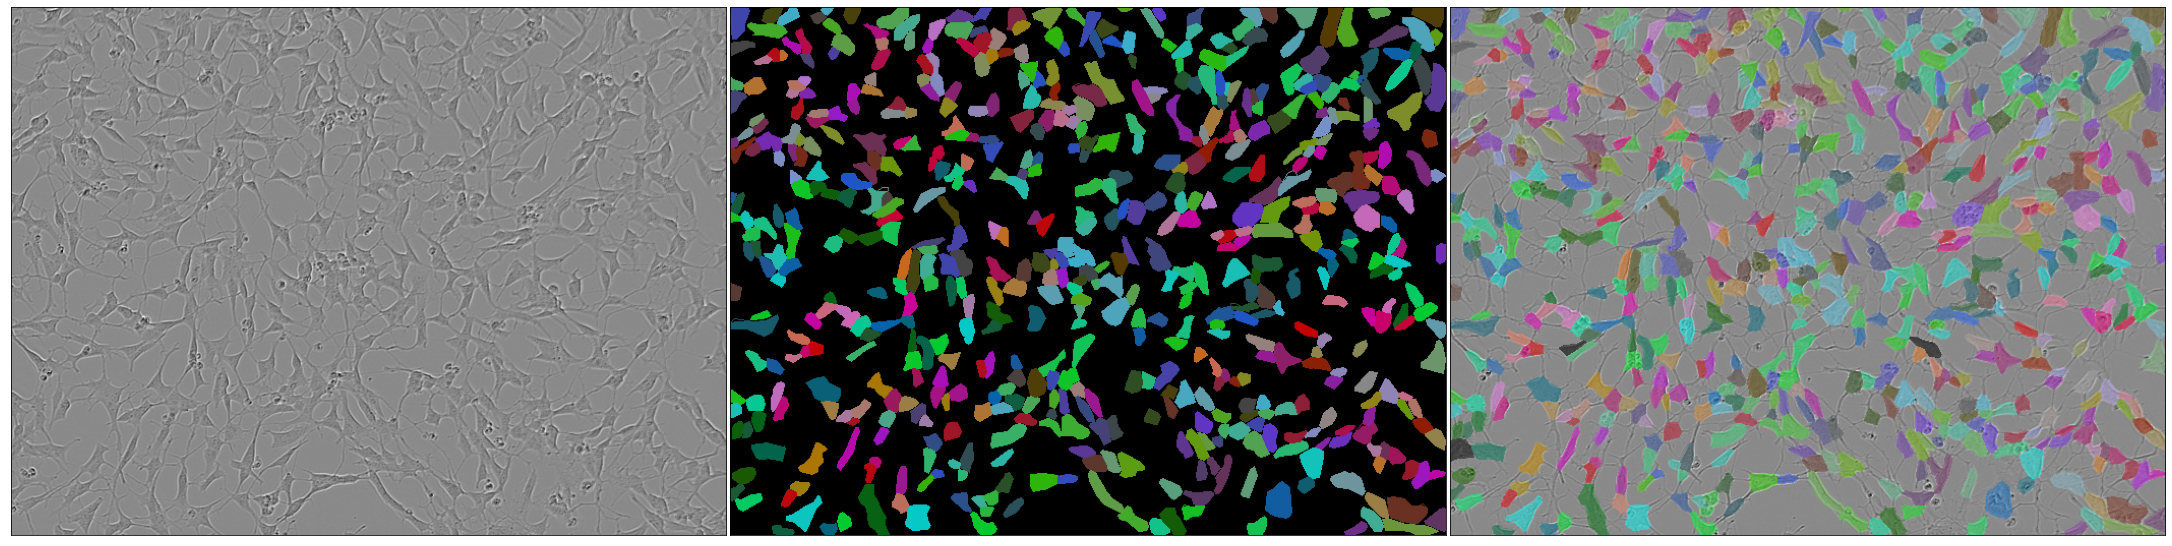

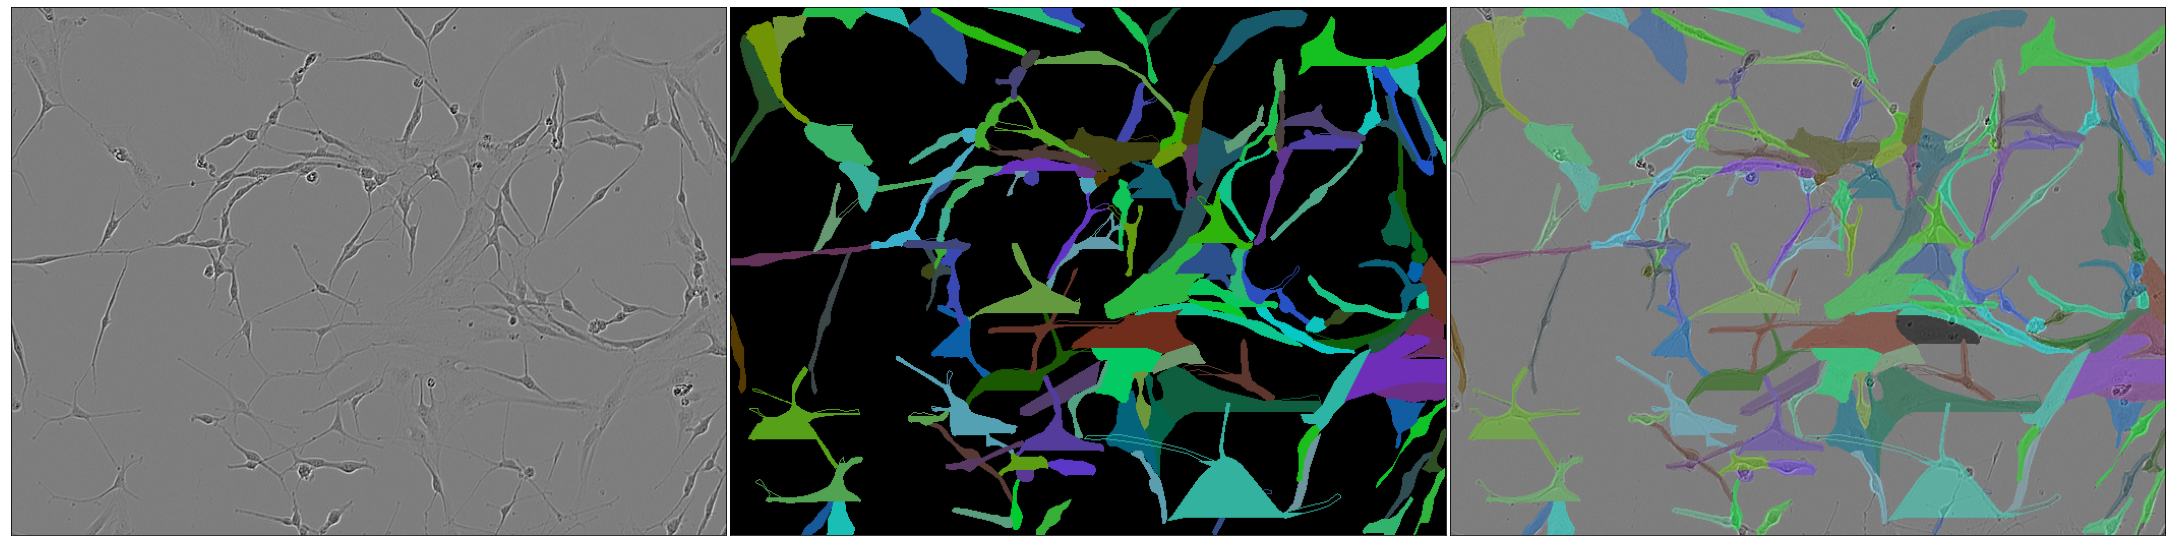

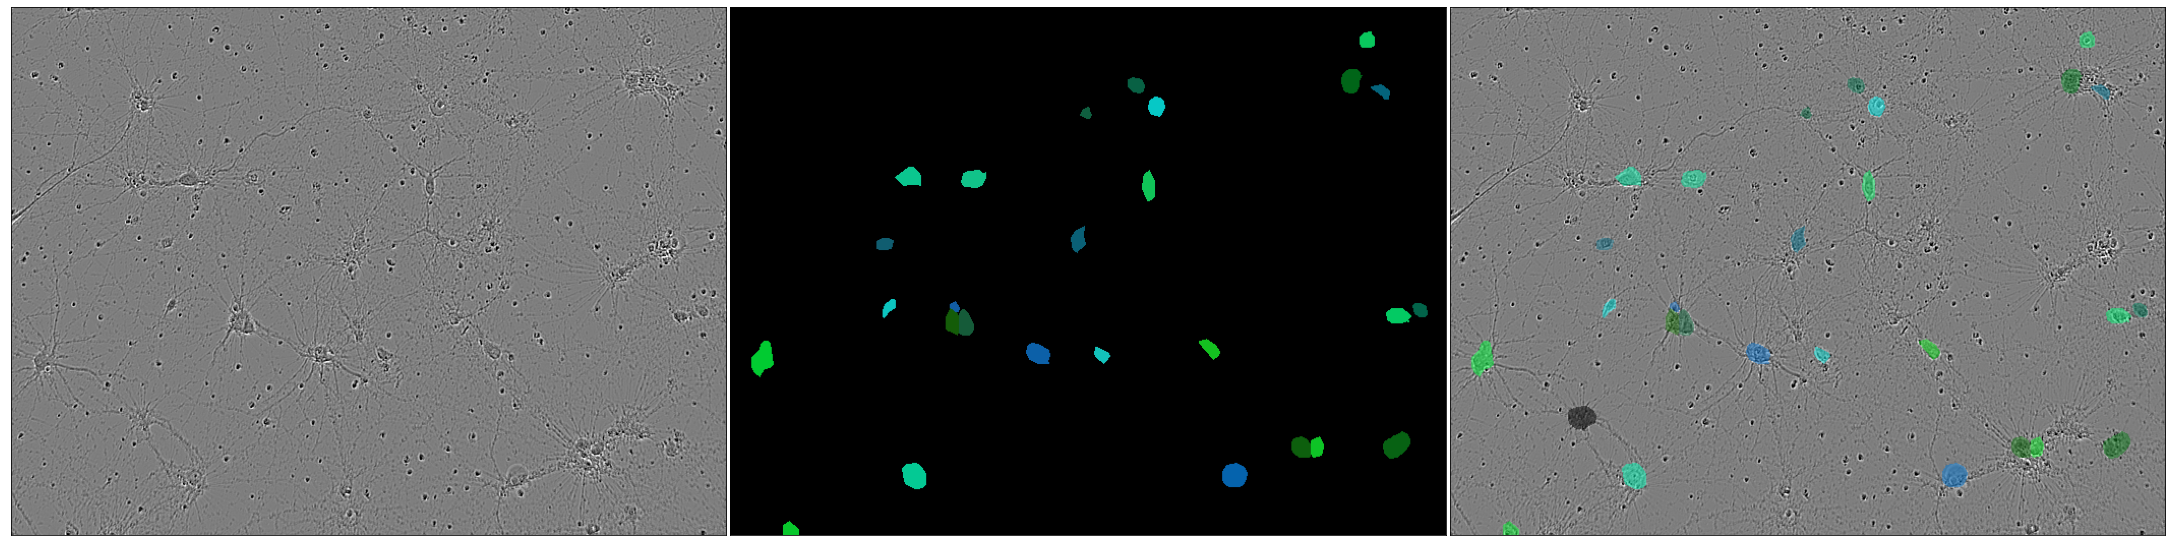

In [20]:
for ii, index in enumerate([0, 8, 9]):
    image, target, cell_type, image_id = dataset[index]
    draw_beautiful_plot(image, target, cell_type, image_id)